### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70301: Mercedes<br>
    3530203_70302: Ford <br>
    3530903_70101: BMW <br>
    3530903_70102: Audi <br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Применить доступные способы предобработки данных.
4. Попытаться обучить регрессию для предсказания цены автомобиля c наилучшим качеством. Качество оценивать по метрике RMSE на тестовой подвыборке. Попробовать различные модели регуляризации (и не только).

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [101]:
auto_data = pd.read_csv("merc.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


# Exploring Data and Preprocessing Data

In [102]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [103]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000,13119.000,13119.000,13119.000,13119.000,13119.000
mean,2017.296,24698.597,21949.559,129.972,55.156,2.072
std,2.225,11842.676,21176.512,65.260,15.220,0.572
min,1970.000,650.000,1.000,0.000,1.100,0.000
25%,2016.000,17450.000,6097.500,125.000,45.600,1.800
50%,2018.000,22480.000,15189.000,145.000,56.500,2.000
75%,2019.000,28980.000,31779.500,145.000,64.200,2.100
max,2020.000,159999.000,259000.000,580.000,217.300,6.200


In [104]:
#auto_data.sort_values('mileage', ascending=True)

In [105]:
#auto_data.sort_values('mpg', ascending=True)

In [106]:
df = auto_data.model.isin(['A Class'])
auto_data[df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



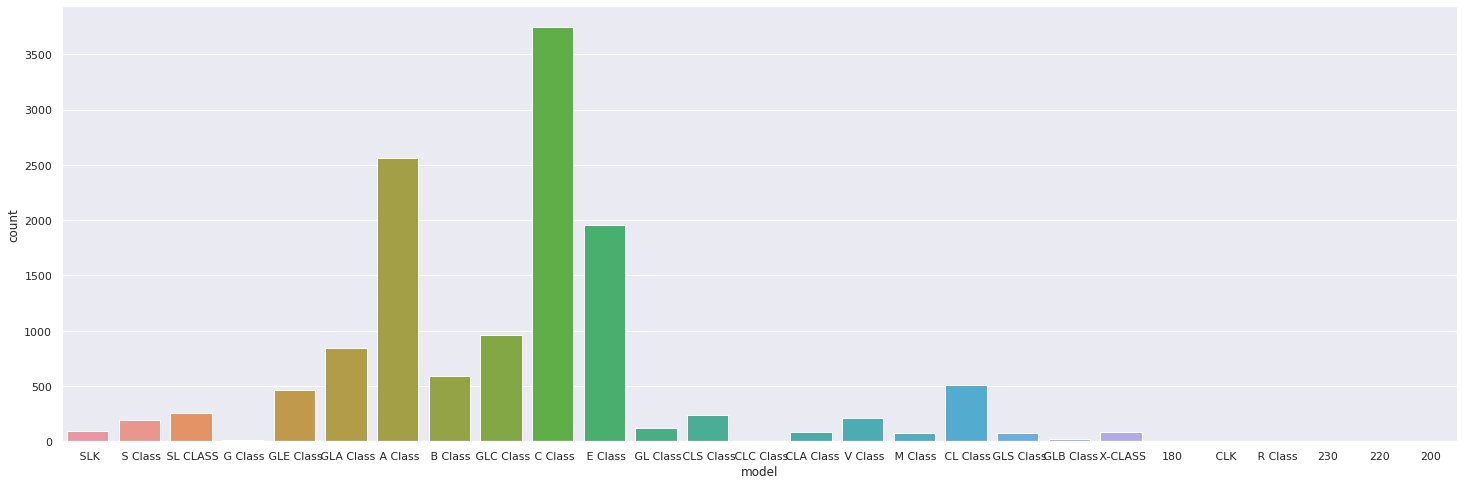

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
sns.countplot(auto_data['model'])
plt.show()

**У модели A class mpg не может быть равен 1.1, поэтому удалим их из датасета**

In [108]:
auto_data.loc[:,['mpg']] = auto_data['mpg'].replace(to_replace=[1.1],value=np.NaN)
auto_data.dropna(how='any', axis=0, inplace=True)

**Проверим на null значения**

In [109]:
auto_data.isnull().sum()

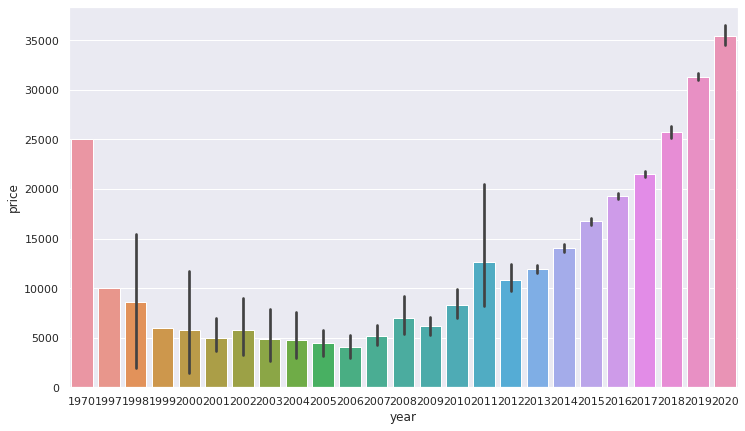

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,7))
sns.barplot(x=auto_data['year'], y=auto_data['price'])

In [111]:
year_1970_df = auto_data['year'] == 1970
auto_data[year_1970_df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12072,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0


Уберем 1970 год со слишком высокой ценой из датафрейма, так как он может испортить модель

In [112]:
auto_data.drop(labels = [12072],axis = 0, inplace=True)

In [113]:
auto_data.sort_values(by='price', ascending=False)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6199,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
...,...,...,...,...,...,...,...,...,...
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0


In [114]:
auto_data.sort_values(by='price')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11816,A Class,2003,650,Manual,109090,Petrol,235,40.0,1.4
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
...,...,...,...,...,...,...,...,...,...
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0


Price 650 выглядит как выброс, лучше выбросить

In [115]:
auto_data.drop(labels = [11816],axis = 0, inplace=True)

In [116]:
auto_data.sort_values(by='price')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
11174,S Class,2001,1695,Automatic,108800,Diesel,325,31.7,3.2
...,...,...,...,...,...,...,...,...,...
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0


**Заменим год выпуска автомобиля на ее возраст**

In [117]:
auto_data['year'] = 2020-auto_data['year']

In [118]:
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,15,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,3,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,4,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,4,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,4,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,0,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,0,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,1,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,1,37990,Automatic,2426,Diesel,145,45.6,2.0


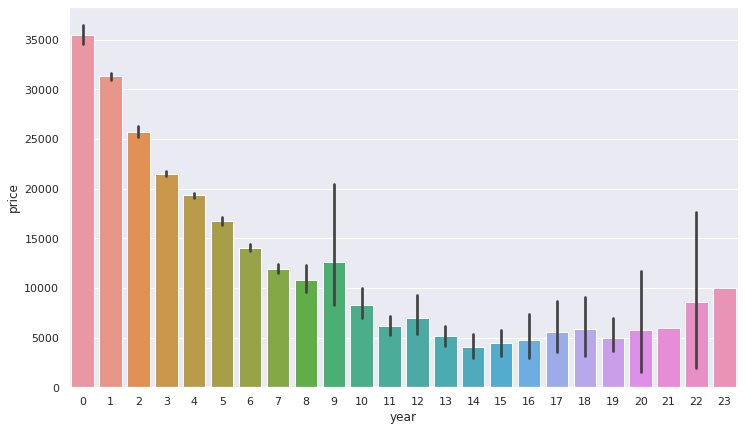

In [119]:
plt.subplots(figsize=(12,7))
sns.barplot(x=auto_data['year'], y=auto_data['price'])

In [120]:
auto_data.sort_values(by='mpg', ascending=False)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6205,C Class,1,34890,Semi-Auto,1139,Hybrid,135,217.3,2.0
12894,C Class,0,40999,Automatic,400,Other,135,217.3,2.0
11419,E Class,1,34995,Automatic,4129,Hybrid,140,201.8,2.0
7929,E Class,1,38500,Semi-Auto,12422,Hybrid,135,188.3,2.0
8639,E Class,1,41399,Semi-Auto,7220,Hybrid,135,188.3,2.0
...,...,...,...,...,...,...,...,...,...
11923,E Class,12,14995,Semi-Auto,55000,Petrol,570,19.8,6.2
12770,S Class,10,26990,Automatic,38000,Petrol,570,19.5,6.2
11580,CL Class,12,18975,Automatic,69000,Petrol,570,19.0,6.2
11581,CLK,17,3495,Automatic,185000,Petrol,330,17.8,4.3


Значение mpg = 217 не выглядит, как выброс

In [121]:
auto_data.corr(method='spearman')["price"].sort_values(ascending=False)

In [122]:
auto_data_engineSize0 = auto_data['engineSize'].isin([0])
auto_data[auto_data_engineSize0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9618,A Class,4,17500,Automatic,29712,Diesel,20,68.9,0.0
9619,A Class,2,20500,Automatic,13386,Petrol,145,53.3,0.0
9621,A Class,2,18000,Automatic,18347,Diesel,150,65.7,0.0
9650,GLA Class,4,18700,Other,30895,Other,125,56.5,0.0
9654,A Class,4,17800,Automatic,21913,Diesel,20,68.9,0.0
10675,SL CLASS,4,16500,Automatic,26955,Diesel,30,70.6,0.0
10710,A Class,2,17500,Automatic,19796,Diesel,145,74.3,0.0
10739,GLA Class,3,16000,Manual,34635,Diesel,30,64.2,0.0
10815,A Class,3,18000,Automatic,33282,Diesel,145,68.9,0.0
11183,E Class,2,22738,Automatic,24000,Diesel,150,61.4,0.0


https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/discussion/209170 - engineSize = 0 - для электромобилей (ответ автора датасета)

In [123]:
import plotly.express as px
model_count= auto_data
ax2= px.treemap(model_count,path=["model"],title="Popularity of the bought car models:")
ax2.show()

Unsupported

**Проверим датасет на дубликаты и удалим их**

In [124]:
duplicated_df = auto_data.duplicated(keep = False)
auto_data[duplicated_df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
468,V Class,2,19998,Manual,27222,Diesel,145,46.3,2.1
469,V Class,4,17998,Manual,21981,Diesel,200,46.3,2.1
493,V Class,2,19998,Manual,27222,Diesel,145,46.3,2.1
494,V Class,4,17998,Manual,21981,Diesel,200,46.3,2.1
1327,GLB Class,0,35400,Semi-Auto,2000,Diesel,145,46.3,2.0
...,...,...,...,...,...,...,...,...,...
11742,E Class,4,17990,Automatic,39000,Diesel,30,65.7,2.0
12798,A Class,0,26590,Automatic,2563,Petrol,145,53.3,1.3
12799,B Class,0,27490,Automatic,2563,Diesel,145,55.4,2.0
12800,B Class,0,27490,Automatic,2563,Diesel,145,55.4,2.0


In [125]:
auto_data=auto_data.drop_duplicates(keep="first")

In [126]:
duplicated_df = auto_data.duplicated(keep = False)
auto_data[duplicated_df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


**Проверим номинальные признаки**

In [127]:
auto_data.model.value_counts()

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



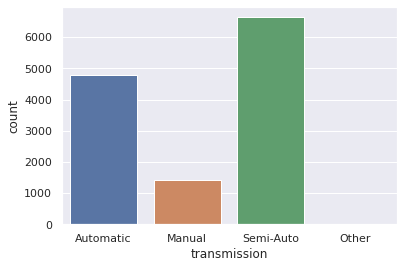

In [128]:
sns.countplot(auto_data["transmission"])

In [129]:
auto_data['transmission'].value_counts()

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



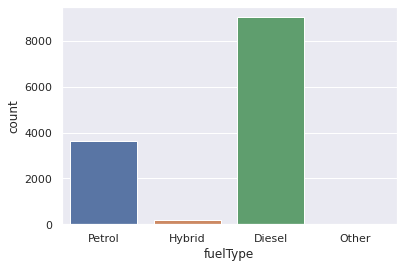

In [130]:
sns.countplot(auto_data["fuelType"])

In [131]:
auto_data['fuelType'].value_counts()

In [132]:
df = auto_data.fuelType=='Other'
auto_data[df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9650,GLA Class,4,18700,Other,30895,Other,125,56.5,0.0
11740,GLE Class,4,31990,Automatic,46000,Other,0,76.4,3.0
12095,C Class,4,13850,Automatic,77814,Other,0,134.5,2.0
12184,C Class,3,17400,Automatic,52897,Other,0,134.5,2.0
12270,C Class,3,16000,Automatic,54011,Other,0,134.5,2.0
12389,C Class,5,15000,Automatic,53400,Other,0,134.5,2.0
12894,C Class,0,40999,Automatic,400,Other,135,217.3,2.0


**Что за значение other?**
<br>
Семён 19:42<br>
Для авто только это<br>
Керосин самолеты и ракеты<br>

Мнение эксперта<br>
Поэтому выкинем их

In [133]:
auto_data.loc[:,['fuelType']] = auto_data['fuelType'].replace(to_replace=['Other'],value=np.NaN)
auto_data.dropna(how='any', axis=0, inplace=True)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/python/envs/default/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
df = auto_data.fuelType=='Other'
auto_data[df]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


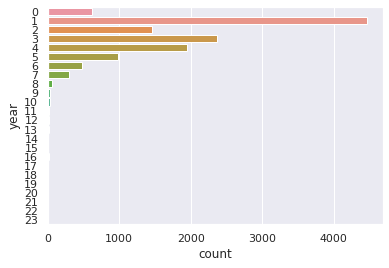

In [135]:
sns.countplot(y = auto_data["year"])

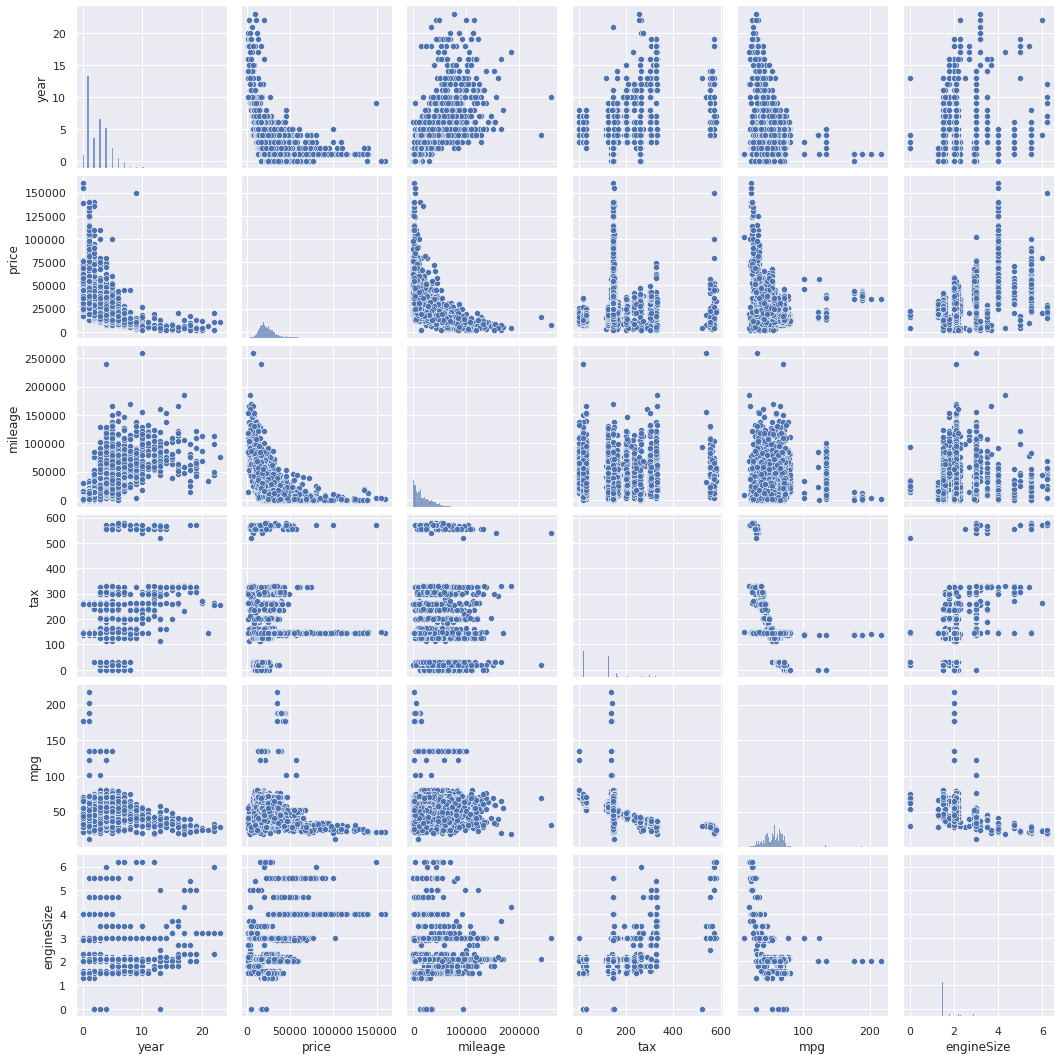

In [136]:
sns.pairplot(auto_data)

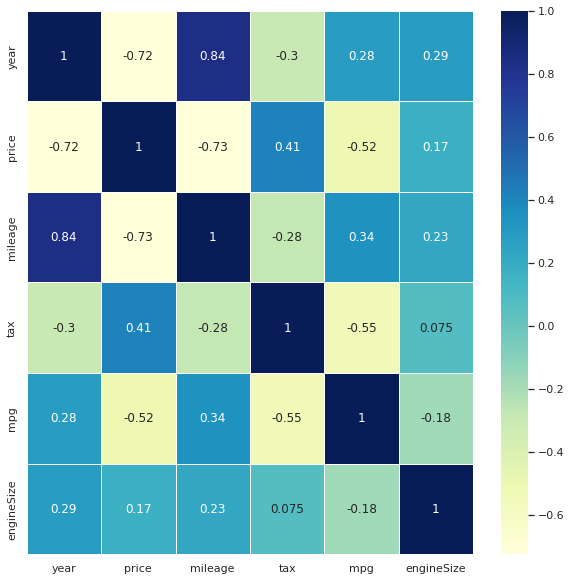

In [137]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax, cmap="YlGnBu" )

Год и пробег с примерно одинаковой силой влияют на цену автомобиля. Прямая и обратная зависимость соответственно<br>
Налог в UK зависит от выбросов CO2 в воздух. Чем больше расход топлива, тем больше выброс. **<br>Почему тогда корреляция негативная?**

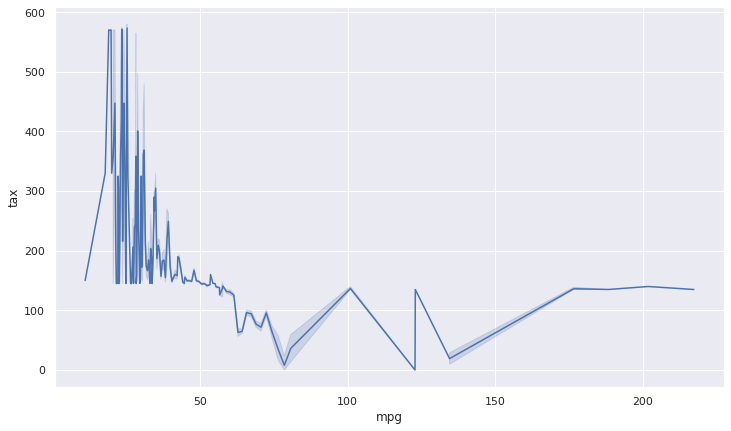

In [138]:
plt.subplots(figsize=(12,7))
sns.lineplot(data=auto_data, x="mpg", y="tax")

**Закодируем строковые поля числовыми значениями**

In [139]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(auto_data['model'])
label_encoder.transform(auto_data['model'])
auto_data['model'] = label_encoder.transform(auto_data['model'])

<ipython-input-139-73a64c2f1a66>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
label_encoder = LabelEncoder()
label_encoder.fit(auto_data['transmission'])
label_encoder.transform(auto_data['transmission'])
auto_data['transmission'] = label_encoder.transform(auto_data['transmission'])

<ipython-input-140-f325777b15a8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
label_encoder = LabelEncoder()
label_encoder.fit(auto_data['fuelType'])
label_encoder.transform(auto_data['fuelType'])
auto_data['fuelType'] = label_encoder.transform(auto_data['fuelType'])
auto_data

<ipython-input-141-95f516c8b3b0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,20,15,5200,0,63000,2,325,32.1,1.8
1,18,3,34948,0,27000,1,20,61.4,2.1
2,19,4,49948,0,6200,2,555,28.0,5.5
3,9,4,61948,0,16000,2,325,30.4,4.0
4,9,4,73948,0,4000,2,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,2,0,35999,0,500,0,145,55.4,2.0
13115,1,0,24699,0,2500,0,145,55.4,2.0
13116,13,1,30999,0,11612,0,145,41.5,2.1
13117,7,1,37990,0,2426,0,145,45.6,2.0


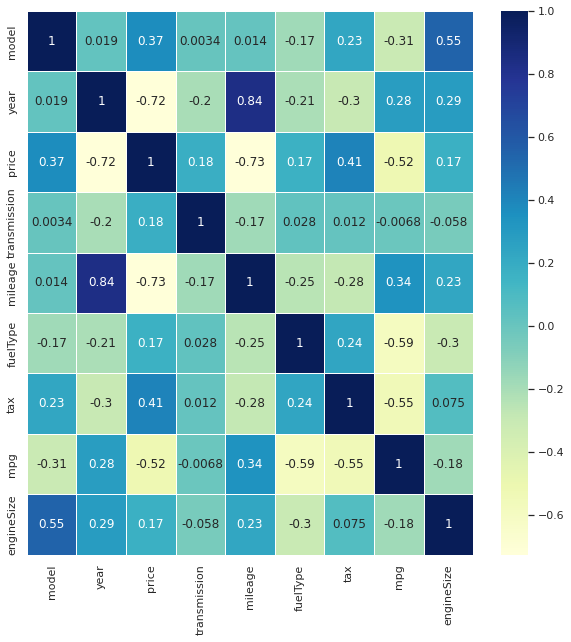

In [142]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax, cmap="YlGnBu" )

In [143]:
auto_data.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,12848.000,12848.000,12848.000,12848.000,12848.000,12848.000,12848.000,12848.000,12848.000
mean,5.821,2.728,24638.016,1.661,22155.748,0.581,129.870,55.174,2.076
std,5.873,2.183,11875.069,1.415,21057.280,0.901,65.536,15.031,0.573
min,0.000,0.000,1350.000,0.000,1.000,0.000,0.000,11.000,0.000
25%,2.000,1.000,17318.250,0.000,6498.000,0.000,125.000,45.600,1.800
50%,2.000,2.000,22299.000,3.000,15446.500,0.000,145.000,56.500,2.000
75%,11.000,4.000,28953.750,3.000,32000.000,2.000,145.000,64.200,2.100
max,26.000,23.000,159999.000,3.000,259000.000,2.000,580.000,217.300,6.200


# Train test split

In [144]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

In [145]:
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10, shuffle=True)

In [147]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

# Линейная регрессия

In [148]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_MSE = metrics.mean_squared_error(Y_test, simple_LR_predictions)
simple_LR_MSE

40467910.204683654

In [149]:
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared=False)
print('RMSE LinearRegression', simple_LR_RMSE) 

RMSE LinearRegression 6361.439318635654


стандартное отклонение

In [150]:
Y_test.std()

11912.561005497835

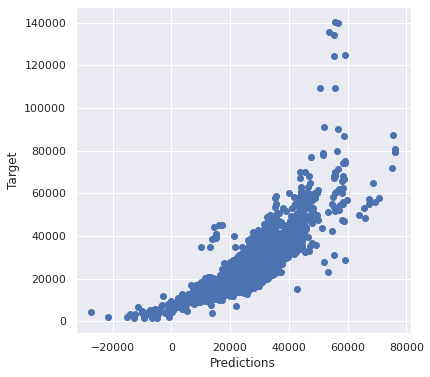

In [151]:
plt.figure(figsize=(6, 6))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

Судя по графику получилось не очень

In [152]:
simple_LR.intercept_, simple_LR.coef_

(24586.573001223172,
 array([ 1464.004, -4992.71 ,    42.151, -2509.823,   927.67 , -1095.13 ,
        -1793.679,  6227.343]))

In [153]:
pd.DataFrame(simple_LR.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,1464.004
price,-4992.710
transmission,42.151
mileage,-2509.823
fuelType,927.670
tax,-1095.130
mpg,-1793.679
engineSize,6227.343


# Применим регуляризацию

In [154]:
lasso_model = Lasso()

lasso_model.fit(X_train_scaled, Y_train)
predictions = lasso_model.predict(X_test_scaled)
metrics.mean_squared_error(Y_test, predictions, squared=False)


6361.425179441612

In [155]:
pd.DataFrame(lasso_model.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,1462.747
price,-4992.859
transmission,41.420
mileage,-2508.857
fuelType,926.341
tax,-1092.392
mpg,-1792.857
engineSize,6226.115


In [156]:
lasso_model = LassoCV(random_state=10)

lasso_model.fit(X_train_scaled, Y_train)
predictions = lasso_model.predict(X_test_scaled)

metrics.mean_squared_error(Y_test, predictions, squared=False)


6361.3971993666855

Невероятно, но почти ничего не изменилось

In [157]:
pd.DataFrame(lasso_model.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,1455.877
price,-4990.309
transmission,37.263
mileage,-2506.316
fuelType,919.006
tax,-1078.046
mpg,-1788.694
engineSize,6219.256


In [158]:
ridge_model = Ridge()

ridge_model.fit(X_train_scaled, Y_train)
predictions = ridge_model.predict(X_test_scaled)

metrics.mean_squared_error(Y_test, predictions, squared=False)


6361.42963571281

In [159]:
pd.DataFrame(ridge_model.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,1464.050
price,-4991.750
transmission,42.273
mileage,-2510.156
fuelType,927.470
tax,-1094.661
mpg,-1793.703
engineSize,6226.341


In [160]:
ridge_model = RidgeCV()

ridge_model.fit(X_train_scaled, Y_train)
predictions = ridge_model.predict(X_test_scaled)

metrics.mean_squared_error(Y_test, predictions, squared=False)


6361.351549189022

In [161]:
pd.DataFrame(ridge_model.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,1464.459
price,-4983.133
transmission,43.373
mileage,-2513.128
fuelType,925.684
tax,-1090.447
mpg,-1793.909
engineSize,6217.332


In [162]:
alphas = np.linspace(1, 10, 20)
alphas

In [163]:
lasso_model = LassoCV(random_state = 10, alphas=alphas)

lasso_model.fit(X_train_scaled, Y_train)
predictions = lasso_model.predict(X_test_scaled)

metrics.mean_squared_error(Y_test, predictions, squared=False)

6361.4107553667745

In [164]:

pd.DataFrame(lasso_model.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,1460.328
price,-4991.961
transmission,39.957
mileage,-2507.962
fuelType,923.759
tax,-1087.342
mpg,-1791.391
engineSize,6223.700


# Random Forest Regressor

In [165]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(random_state = 10, n_estimators = 100)

rfr_model.fit(X_train_scaled, Y_train)
predictions = rfr_model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(rfr_model.feature_importances_, X.columns, 
             columns=['Importance']).sort_values('Importance')

RMSE = 2531.985


,Importance
fuelType,0.003
transmission,0.005
tax,0.021
model,0.109
year,0.140
mpg,0.173
mileage,0.254
engineSize,0.296


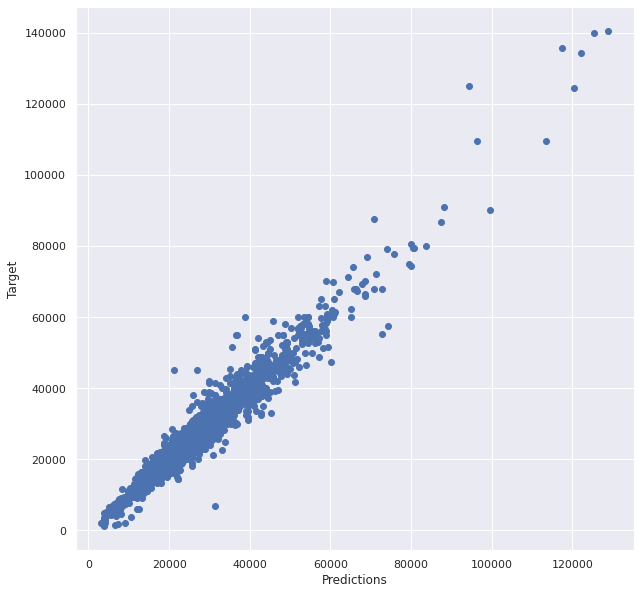

In [166]:
plt.figure(figsize=(10, 10))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [91]:
predictions= pd.DataFrame(predictions,columns=['Expected'])
predictions

,Expected
0,36949.930
1,9221.340
2,37485.307
3,26173.152
4,26340.760
...,...
3850,26177.220
3851,5140.680
3852,51942.780
3853,37872.890


In [93]:
y= pd.DataFrame(Y)
y

,price
0,5200
1,34948
2,49948
3,61948
4,73948
...,...
13114,35999
13115,24699
13116,30999
13117,37990


In [97]:
y['Expected'] = predictions
y

,price,Expected
0,5200,36949.930
1,34948,9221.340
2,49948,37485.307
3,61948,26173.152
4,73948,26340.760
...,...,...
13114,35999,NaN
13115,24699,NaN
13116,30999,NaN
13117,37990,NaN


In [90]:
comparassion = pd.DataFrame(predictions,columns=['Expected'])
y_pred = pd.DataFrame(Y_test)
y_pred['Expected'] = comparassion
y_pred.head(10)

,price,Expected
4232,54995,NaN
11000,9250,NaN
6602,38509,NaN
4595,25990,NaN
4618,27990,NaN
6464,21890,NaN
2279,49980,29441.13
8105,25849,NaN
10780,19400,NaN
1238,26499,23005.94


In [69]:
def regression_model(model):
    regressor = model
    regressor.fit(X_train_scaled, Y_train)

    score = regressor.score(X_test_scaled, Y_test)
    return regressor, score

In [70]:

model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
alphas = (1, 10, 20)
models_to_evaluate = [LinearRegression(), Ridge(), RidgeCV(alphas), Lasso(), LassoCV(), RandomForestRegressor(random_state = 10, n_estimators = 100)]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,LinearRegression(),0.715
1,Linear,Ridge(),0.715
2,Linear,"RidgeCV(alphas=array([ 1, 10, 20]))",0.715
3,Linear,Lasso(),0.715
4,Linear,LassoCV(),0.715
5,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.955


In [71]:
rfr_model.fit(X_train_scaled, Y_train)
score = rfr_model.score(X_test_scaled, Y_test)
score

0.9548118396577118

# Модель без номинальных признаков

In [72]:
auto_data_no_nominal_cols = auto_data.drop(['transmission','fuelType'], axis=1, inplace=False)

In [73]:
auto_data_no_nominal_cols.head()

,model,year,price,mileage,tax,mpg,engineSize
0,20,15,5200,63000,325,32.1,1.8
1,18,3,34948,27000,20,61.4,2.1
2,19,4,49948,6200,555,28.0,5.5
3,9,4,61948,16000,325,30.4,4.0
4,9,4,73948,4000,325,30.1,4.0


In [74]:
X, Y = auto_data_no_nominal_cols.drop(['price'], axis=1), auto_data_no_nominal_cols['price']

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10, shuffle=True)

In [76]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

In [77]:

rfr_model = RandomForestRegressor(random_state = 10, n_estimators = 100)

rfr_model.fit(X_train, Y_train)
predictions = rfr_model.predict(X_test)

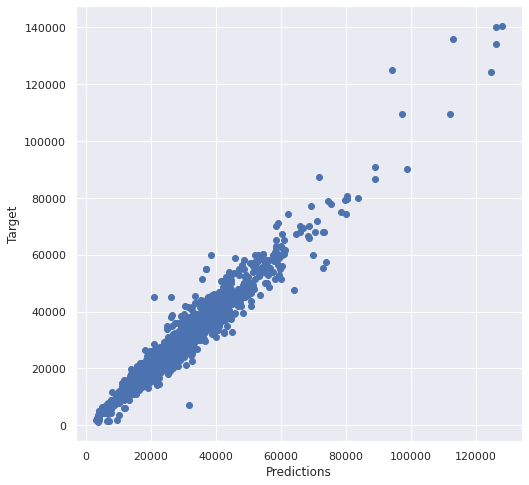

In [78]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [79]:
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 2595.974


это ни к чему хорошему не привело, что и требовалось доказать